# Data visualisation

## 0. Chargement 

### Librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.font_manager as fm

In [ ]:
!streamlit run app.py

OSError: Background processes not supported.

### Dataset

In [3]:
df_train = pd.read_csv('train.csv')

### Police et palettes de couleur

In [4]:

# Liste toutes les polices disponibles
available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
print(available_fonts)


['C059', 'C059', 'C059', 'C059', 'D050000L', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'Droid Sans Fallback', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Nimbus Mono PS', 'Nimbus Mono PS', 'Nimbus Mono PS', 'Nimbus Mono PS', 'Nimbus Roman', 'Nimbus Roman', 'Nimbus Roman', 'Nimbus Roman', 'Nimbus Sans', 'Nimbus Sans', 'Nimbus Sans', 'Nimbus Sans', 'Nimbus

In [5]:
# -----------------------------
# 1️⃣ Créer un dégradé rouge-orangé-jaune foncé (éviter les jaunes clairs)
# -----------------------------
cmap = cm.get_cmap("YlOrRd")  # colormap
# On prend les couleurs de 0.3 à 1.0 pour éviter les jaunes très clairs
palette_gradient = [cmap(0.3 + 0.7*i/13) for i in range(14)]

# -----------------------------
# 2️⃣ Police et style global
# -----------------------------
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

/tmp/ipykernel_4611/3159103769.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlOrRd")  # colormap


## 1. Individus 

### Age 

In [6]:
df_age = df_train[['_AGEG5YR']].copy()

print(df_age['_AGEG5YR'].unique())


[13.  3.  5.  8.  1. 10.  7.  6. 11. 14.  4. 12.  9.  2.]


/tmp/ipykernel_4611/4087546862.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette=palette_gradient)


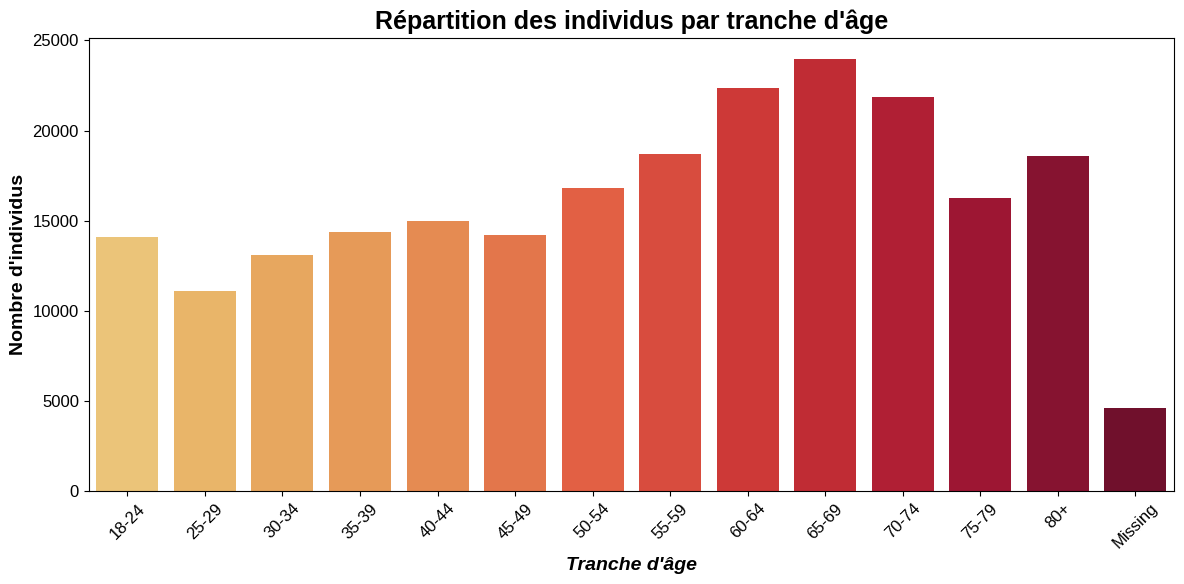

In [7]:
# -----------------------------
# 3️⃣ Mapping des codes vers tranches d'âge
# -----------------------------
age_mapping = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79",
    13: "80+", 14: "Missing"
}

# -----------------------------
# 4️⃣ Préparer le DataFrame
# -----------------------------
df_age = df_train[['_AGEG5YR']].copy()
df_age['age_group'] = df_age['_AGEG5YR'].map(age_mapping)

# Compter les individus par tranche et garder l'ordre
age_counts = df_age['age_group'].value_counts().reindex(age_mapping.values())

# -----------------------------
# 5️⃣ Graphe Seaborn avec dégradé
# -----------------------------
plt.figure(figsize=(12,6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=palette_gradient)

# Titres et labels
plt.xlabel("Tranche d'âge", fontsize=14, fontweight='bold', style='italic')
plt.ylabel("Nombre d'individus", fontsize=14, fontweight='bold')
plt.title("Répartition des individus par tranche d'âge", fontsize=18, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Age et Sexe

In [8]:
df_age = df_train[['_AGEG5YR']].copy()

print(df_age['_AGEG5YR'].unique())

[13.  3.  5.  8.  1. 10.  7.  6. 11. 14.  4. 12.  9.  2.]


In [9]:
df_SEX = df_train[['_SEX']].copy()
print(df_SEX['_SEX' ].unique())

[2. 1.]


/tmp/ipykernel_4611/1769065313.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_male = cm.get_cmap("Oranges")
/tmp/ipykernel_4611/1769065313.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlOrRd")  # colormap
/tmp/ipykernel_4611/1769065313.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_male = cm.get_cmap("Oranges")
/tmp/ipykernel_4611/1769065313.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecate

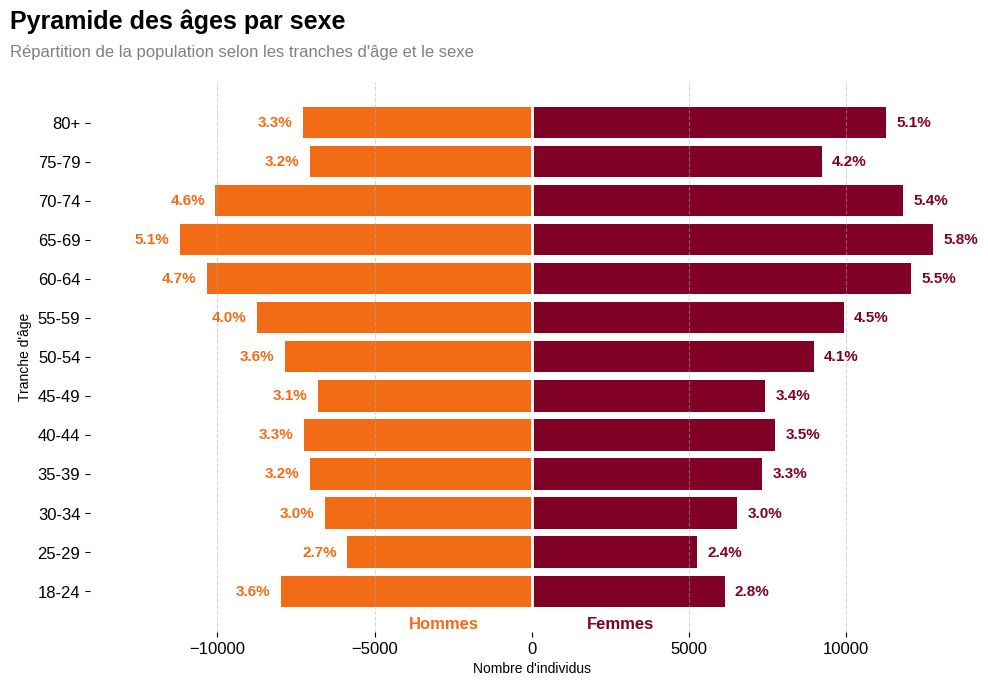

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Couleurs unies claires
# -----------------------------

# color_male = "#FFA07A"   # orange clair
# color_female = "#87CEFA" # bleu clair

cmap_male = cm.get_cmap("Oranges")
color_male = cmap_male(0.4 + 0.4*7/13) # plus clair et harmonieux

# Bleu clair pour femmes
cmap = cm.get_cmap("YlOrRd")  # colormap
color_female = cmap(0.3 + 0.7*13/13) 

# -----------------------------
# 2️⃣ Mapping des tranches d'âge
# -----------------------------
age_mapping = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79",
    13: "80+", 14: "Missing"
}

# -----------------------------
# 3️⃣ Préparer les données
# -----------------------------
df_age_sex = df_train[['_AGEG5YR', '_SEX']].copy()
df_age_sex['age_group'] = df_age_sex['_AGEG5YR'].map(age_mapping)
df_age_sex = df_age_sex[df_age_sex['age_group'] != 'Missing']

age_sex_counts = df_age_sex.groupby(['age_group', '_SEX']).size().unstack(fill_value=0)

# Hommes = gauche (négatif), Femmes = droite (positif)
age_sex_counts['Male'] = -age_sex_counts.get(1, 0)
age_sex_counts['Female'] = age_sex_counts.get(2, 0)

age_order = list(age_mapping.values())[:-1]
age_sex_counts = age_sex_counts.reindex(age_order)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Couleurs unies claires
# -----------------------------

# color_male = "#FFA07A"   # orange clair
# color_female = "#87CEFA" # bleu clair

cmap_male = cm.get_cmap("Oranges")
color_male = cmap_male(0.4 + 0.4*7/13) # plus clair et harmonieux

# Bleu clair pour femmes
cmap = cm.get_cmap("YlOrRd")  # colormap
color_female = cmap(0.3 + 0.7*13/13) 

# -----------------------------
# 2️⃣ Mapping des tranches d'âge
# -----------------------------
age_mapping = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79",
    13: "80+", 14: "Missing"
}

# -----------------------------
# 3️⃣ Préparer les données
# -----------------------------
df_age_sex = df_train[['_AGEG5YR', '_SEX']].copy()
df_age_sex['age_group'] = df_age_sex['_AGEG5YR'].map(age_mapping)
df_age_sex = df_age_sex[df_age_sex['age_group'] != 'Missing']

age_sex_counts = df_age_sex.groupby(['age_group', '_SEX']).size().unstack(fill_value=0)

# Hommes = gauche (négatif), Femmes = droite (positif)
age_sex_counts['Male'] = -age_sex_counts.get(1, 0)
age_sex_counts['Female'] = age_sex_counts.get(2, 0)

age_order = list(age_mapping.values())[:-1]
age_sex_counts = age_sex_counts.reindex(age_order)

# Pourcentages
total_population = df_age_sex.shape[0]
age_sex_percent = age_sex_counts.copy()
age_sex_percent['Male'] = age_sex_percent['Male'].abs() / total_population * 100
age_sex_percent['Female'] = age_sex_percent['Female'] / total_population * 100

# -----------------------------
# 4️⃣ Plot pyramide
# -----------------------------
fig, ax = plt.subplots(figsize=(10,7))

for age in age_order:
    # Barres
    ax.barh(age, age_sex_counts.loc[age, 'Male'], color=color_male)
    ax.barh(age, age_sex_counts.loc[age, 'Female'], color=color_female)
    
    # Pourcentages proches du bout des barres et en gras
    offset = 0.0015 * total_population
    ax.text(age_sex_counts.loc[age, 'Male'] - offset, age, 
            f"{age_sex_percent.loc[age,'Male']:.1f}%", 
            ha='right', va='center', color=color_male, fontsize=11, fontweight='bold')
    ax.text(age_sex_counts.loc[age, 'Female'] + offset, age, 
            f"{age_sex_percent.loc[age,'Female']:.1f}%", 
            ha='left', va='center', color=color_female, fontsize=11, fontweight='bold')

# -----------------------------
# 5️⃣ Ajouter un trait blanc vertical pour séparer hommes/femmes
# -----------------------------
ax.axvline(x=0, color='white', linewidth=2)

# Axes et style
ax.set_xlabel("Nombre d'individus", fontsize=10)
ax.set_ylabel("Tranche d'âge", fontsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)

# Étendre l'intervalle des abscisses
x_max = max(age_sex_counts['Female'].max(), abs(age_sex_counts['Male'].min())) * 1.1
ax.set_xlim(-x_max, x_max)

# -----------------------------
# 6️⃣ Ajouter "Hommes" et "Femmes" sous les barres
# -----------------------------
ax.text(-x_max*0.20, -0.85, "Hommes", ha='center', va='center', fontsize=12, fontweight='bold', color=color_male)
ax.text(x_max*0.20, -0.85, "Femmes", ha='center', va='center', fontsize=12, fontweight='bold', color=color_female)

# -----------------------------
# 7️⃣ Titre et sous-titre
# -----------------------------
fig.text(0.01, 0.95, "Pyramide des âges par sexe", fontsize=18, fontweight='bold', color='black', ha='left')
fig.text(0.01, 0.91, "Répartition de la population selon les tranches d'âge et le sexe", fontsize=12, color='gray', ha='left')

plt.tight_layout(rect=[0,0,1,0.9])
plt.show()




faire la même chose mais avec ceux qui ont une crise cardiaque

In [22]:
df_heartattack = df_train['TARGET']

print(df_heartattack.unique())

[ True False]


/tmp/ipykernel_4611/884579483.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_male = cm.get_cmap("Oranges")
/tmp/ipykernel_4611/884579483.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_female = cm.get_cmap("YlOrRd")
/tmp/ipykernel_4611/884579483.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_no = age_sex_target.loc[age,1].get(0,0)
/tmp/ipykernel_4611/884579483.py:55: FutureWarning: Series.__getitem__ treating keys as posi

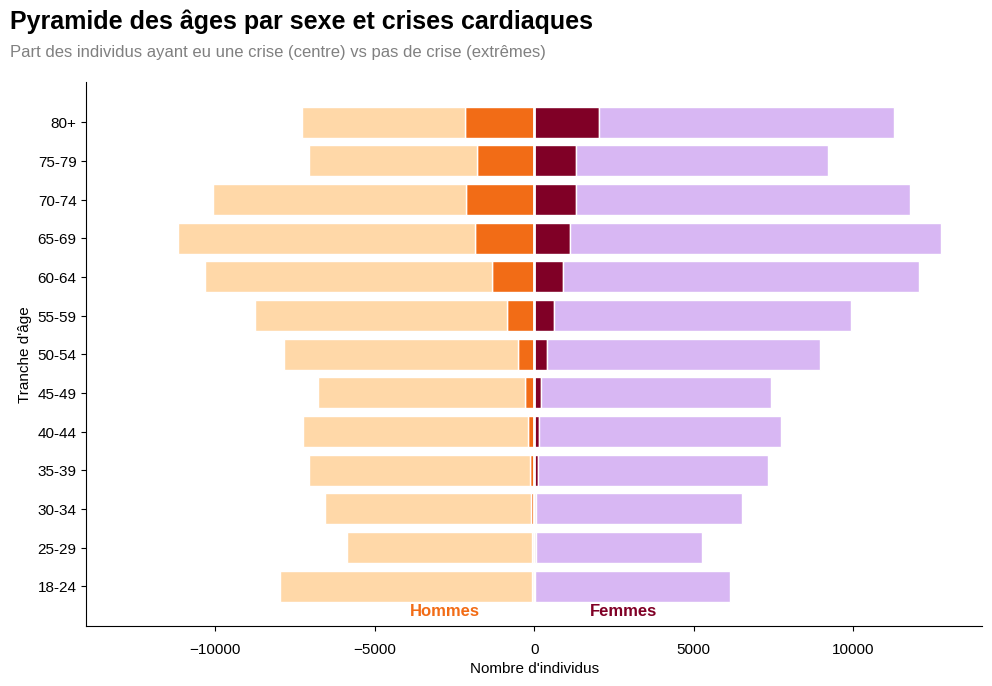

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# -----------------------------
# 1️⃣ Couleurs
# -----------------------------
cmap_male = cm.get_cmap("Oranges")
color_male_center = cmap_male(0.4 + 0.4*7/13)  # crise cardiaque (foncé)
color_male_side = "#ffd8a8"  # pas de crise (clair)

cmap_female = cm.get_cmap("YlOrRd")
color_female_center = cmap_female(0.3 + 0.7*13/13)
color_female_side = "#d8b7f3"

axis_color = "black"  # axes et ticks en noir

# -----------------------------
# 2️⃣ Mapping tranches d'âge
# -----------------------------
age_mapping = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79",
    13: "80+", 14: "Missing"
}

# -----------------------------
# 3️⃣ Filtrer et préparer les données
# -----------------------------
df_age_sex = df_train[['_AGEG5YR', '_SEX', 'TARGET']].copy()
df_age_sex = df_age_sex.dropna(subset=['_AGEG5YR','_SEX','TARGET'])
df_age_sex['age_group'] = df_age_sex['_AGEG5YR'].map(age_mapping)
df_age_sex = df_age_sex[df_age_sex['age_group'] != 'Missing']

# Créer toutes les combinaisons possibles
all_combinations = pd.MultiIndex.from_product(
    [list(age_mapping.values())[:-1], [1,2], [0,1]],
    names=['age_group','_SEX','TARGET']
)
age_sex_target = df_age_sex.groupby(['age_group','_SEX','TARGET']).size().reindex(all_combinations, fill_value=0).unstack(fill_value=0)

age_order = list(age_mapping.values())[:-1]

# -----------------------------
# 4️⃣ Préparer counts
# -----------------------------
counts_male = []
counts_female = []

for age in age_order:
    # Hommes
    male_no = age_sex_target.loc[age,1].get(0,0)
    male_yes = age_sex_target.loc[age,1].get(1,0)
    counts_male.append((male_no, male_yes))
    
    # Femmes
    female_no = age_sex_target.loc[age,2].get(0,0)
    female_yes = age_sex_target.loc[age,2].get(1,0)
    counts_female.append((female_no, female_yes))

# -----------------------------
# 5️⃣ Plot pyramide empilée avec crises au centre
# -----------------------------
fig, ax = plt.subplots(figsize=(10,7))

for i, age in enumerate(age_order):
    # Hommes : barres négatives
    male_no, male_yes = counts_male[i]
    ax.barh(age, -male_yes, color=color_male_center, edgecolor='white')        # crise au centre
    ax.barh(age, -male_no, left=-male_yes, color=color_male_side, edgecolor='white')  # pas de crise à gauche

    
    # Femmes : barres positives
    female_no, female_yes = counts_female[i]
    # Centre (crises)
    ax.barh(age, female_yes, color=color_female_center, edgecolor='white')
    # Extrêmes
    ax.barh(age, female_no, left=female_yes, color=color_female_side, edgecolor='white')

# -----------------------------
# 6️⃣ Axes, traits et style
# -----------------------------
# Trait blanc central
ax.axvline(x=0, color='white', linewidth=2)

# Spines et ticks en noir
ax.spines['left'].set_color(axis_color)
ax.spines['bottom'].set_color(axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', colors=axis_color, labelsize=11, pad=8)  # abscisses légèrement descendues
ax.tick_params(axis='y', colors=axis_color, labelsize=11)

# Étendre l'intervalle des abscisses
x_max = max(
    max([sum(c) for c in counts_female]),
    max([sum(c) for c in counts_male])
) * 1.1
ax.set_xlim(-x_max, x_max)

# Labels Hommes / Femmes
ax.text(-x_max*0.20, -0.65, "Hommes", ha='center', va='center', fontsize=12, fontweight='bold', color=color_male_center)
ax.text(x_max*0.20, -0.65, "Femmes", ha='center', va='center', fontsize=12, fontweight='bold', color=color_female_center)

# Titres et légendes axes
ax.set_xlabel("Nombre d'individus", fontsize=11, color=axis_color)
ax.set_ylabel("Tranche d'âge", fontsize=11, color=axis_color)

# Titres principaux
fig.text(0.01, 0.95, "Pyramide des âges par sexe et crises cardiaques", fontsize=18, fontweight='bold', color='black', ha='left')
fig.text(0.01, 0.91, "Part des individus ayant eu une crise (centre) vs pas de crise (extrêmes)", fontsize=12, color='gray', ha='left')

plt.tight_layout(rect=[0,0,1,0.9])
plt.show()



### Corrélation entre variables continues et TARGET (binaire). Exemple : PHYSHLTH, MENTHLTH, POORHLTH, SLEPTIM1, WEIGHT2, HEIGHT3. Permet de voir les facteurs de risque potentiels associés aux crises.

je laisse cette partie mais n'a pas l'air de montrer des résultats très intéréssants

#### Pourcentage de Nan dans les paires

In [ ]:
import pandas as pd

# Colonnes continues à analyser
continuous_features = ['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'SLEPTIM1', 'WEIGHT2', 'HEIGHT3']
features = continuous_features + ['TARGET']

# DataFrame pour stocker les pourcentages de NaN
nan_percent = pd.DataFrame(index=features, columns=features, dtype=float)

total_rows = df_train.shape[0]

for col1 in features:
    for col2 in features:
        # Nombre de lignes où col1 ou col2 est NaN
        n_missing = df_train[[col1, col2]].isna().any(axis=1).sum()
        nan_percent.loc[col1, col2] = n_missing / total_rows * 100  # pourcentage

# Afficher le résultat
print(nan_percent)


           PHYSHLTH   MENTHLTH   POORHLTH   SLEPTIM1    WEIGHT2    HEIGHT3  \
PHYSHLTH   0.001778   0.002222  42.827111   0.001778   3.643111   3.910222   
MENTHLTH   0.002222   0.000889  42.826222   0.000889   3.642222   3.909333   
POORHLTH  42.827111  42.826222  42.825778  42.825778  44.713778  44.862222   
SLEPTIM1   0.001778   0.000889  42.825778   0.000444   3.641778   3.908889   
WEIGHT2    3.643111   3.642222  44.713778   3.641778   3.641778   3.908889   
HEIGHT3    3.910222   3.909333  44.862222   3.908889   3.908889   3.908889   
TARGET     0.001778   0.000889  42.825778   0.000444   3.641778   3.908889   

             TARGET  
PHYSHLTH   0.001778  
MENTHLTH   0.000889  
POORHLTH  42.825778  
SLEPTIM1   0.000444  
WEIGHT2    3.641778  
HEIGHT3    3.908889  
TARGET     0.000000  


### Matrice de corrélation

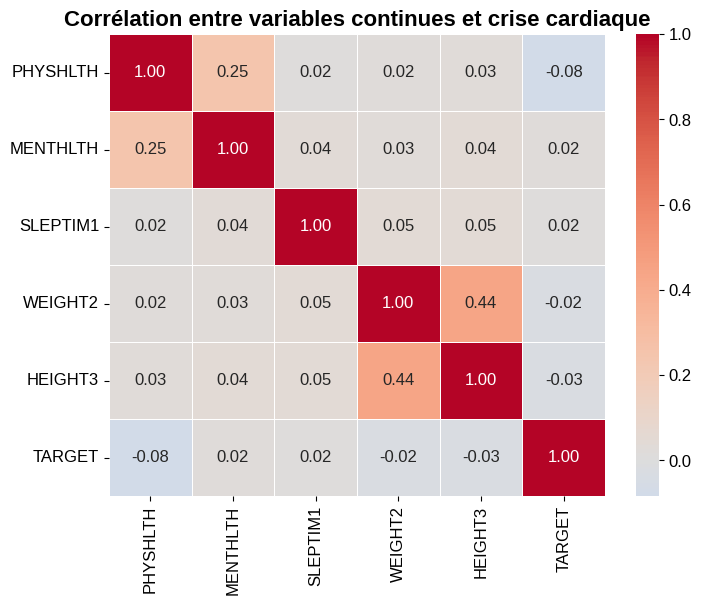

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Variables continues à analyser
# -----------------------------
continuous_vars = ['PHYSHLTH', 'MENTHLTH', 'SLEPTIM1', 'WEIGHT2', 'HEIGHT3']

# -----------------------------
# 2️⃣ Préparer le DataFrame
# -----------------------------
df_corr = df_train[continuous_vars + ['TARGET']].copy()

# Supprimer les lignes avec valeurs manquantes
df_corr = df_corr.dropna()

# -----------------------------
# 3️⃣ Calculer la corrélation
# -----------------------------
corr_matrix = df_corr.corr()

# -----------------------------
# 4️⃣ Heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, linecolor='white')
plt.title("Corrélation entre variables continues et crise cardiaque", fontsize=16, fontweight='bold')
plt.show()
